In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('loan.csv')

In [4]:
df = pd.DataFrame(data)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
null_value_columns = df.isna().any()

null_value_columns

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [8]:
dict_null_values = dict(null_value_columns.loc[lambda x : x!=False])

null_value_columns_list = list(dict_null_values.keys()) 

In [9]:
null_value_columns_list

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [11]:
df.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [12]:
df.shape

(367, 12)

In [13]:
df['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

df.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [14]:
df['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

df.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [15]:
df.Self_Employed.value_counts()

df['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

df.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [16]:
df.LoanAmount.isnull().sum()

5

In [17]:
df[df.LoanAmount.isnull()== True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,LP002360,Male,Yes,0,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,LP002593,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [19]:
from fancyimpute import KNN

In [20]:
KNN_columns = list(df)

In [21]:
KNN_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [24]:
df.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [23]:
PA_dummies = pd.get_dummies(df.Property_Area,drop_first=True)
PA_dummies

,Semiurban,Urban
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
362,0,1
363,0,1
364,1,0
365,0,0


In [27]:
df.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [24]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

df['Married'] = df['Married'].map({'Yes':1,'No':0})

df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,1,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,1,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,1,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0,0,0,0,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,Urban


In [27]:
df1 = pd.concat([df.drop(['Loan_ID','Property_Area'],axis=1),PA_dummies],axis=1)

df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,0,1
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,0,1
3,0,1,2,1,0,2340,2546,100.0,360.0,NaN,0,1
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,0,1


In [75]:
df1['Dependents'] = df1.Dependents.replace({'0':0,'1':1,'2':2,'3+':3})

In [76]:
KNN_columns = list(df1)

In [77]:
df3 = pd.DataFrame(KNN(k=5).fit_transform(df1))

Imputing row 1/367 with 0 missing, elapsed time: 0.030
Imputing row 101/367 with 0 missing, elapsed time: 0.031
Imputing row 201/367 with 0 missing, elapsed time: 0.031
Imputing row 301/367 with 0 missing, elapsed time: 0.032


In [78]:
df3.columns = KNN_columns

In [79]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0.0,1.0,0.0,1.0,0.0,5720.0,0.0,110.0,360.0,1.000000,0.0,1.0
1,0.0,1.0,1.0,1.0,0.0,3076.0,1500.0,126.0,360.0,1.000000,0.0,1.0
2,0.0,1.0,2.0,1.0,0.0,5000.0,1800.0,208.0,360.0,1.000000,0.0,1.0
3,0.0,1.0,2.0,1.0,0.0,2340.0,2546.0,100.0,360.0,0.684541,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,3276.0,0.0,78.0,360.0,1.000000,0.0,1.0


In [36]:
df2.isnull().sum()

1                     0
2                     0
3+                    0
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Semiurban             0
Urban                 0
dtype: int64

In [37]:
df3.isnull().sum()

1                    0
2                    0
3+                   0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Semiurban            0
Urban                0
dtype: int64

In [111]:
X = df3.drop(['LoanAmount','Self_Employed'],axis=1)
y = df3.LoanAmount

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [82]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

linear_regressor = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DtR = DecisionTreeRegressor()


linear_params = {'normalize':[True,False]}
linear_grid = GridSearchCV(linear_regressor,param_grid=linear_params,cv=2)

lasso_params = {'alpha': [0.1,0.25,0.5,1,2,5],'selection': ['random', 'cyclic'],'normalize':[True,False],'selection': ['random', 'cyclic']}
lasso_grid = GridSearchCV(lasso,param_grid=lasso_params,cv=2)

ridge_params = {'alpha': [0.1,0.25,0.5,1,2,5],'solver':['auto', 'svd', 'cholesky','lsqr'],'normalize':[True,False]}
ridge_grid = GridSearchCV(ridge,param_grid=ridge_params,cv=2)

DtR_params = {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random']}
DtR_grid = GridSearchCV(DtR,param_grid=DtR_params,cv=2)

In [83]:
linear_grid.fit(X_train,y_train)
lasso_grid.fit(X_train,y_train)
ridge_grid.fit(X_train,y_train)
DtR_grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'splitter': ['best', 'random']})

In [84]:
print('Best Linear_Regression Parameters : ',linear_grid.best_params_)
print('Best Linear_Regression Score : ',linear_grid.best_score_)

Best Linear_Regression Parameters :  {'normalize': True}
Best Linear_Regression Score :  0.1770733045880209


In [85]:
print('Best Lasso Parameters : ',lasso_grid.best_params_)
print('Best Lasso Score : ',lasso_grid.best_score_)

Best Lasso Parameters :  {'alpha': 2, 'normalize': False, 'selection': 'random'}
Best Lasso Score :  0.21406410421564132


In [86]:
print('Best Ridge_Regression Parameters : ',ridge_grid.best_params_)
print('Best Ridge_Regression Score : ',ridge_grid.best_score_)

Best Ridge_Regression Parameters :  {'alpha': 5, 'normalize': False, 'solver': 'lsqr'}
Best Ridge_Regression Score :  0.20614793555515704


In [87]:
print('Best DecisionTreeRegression Parameters : ',DtR_grid.best_params_)
print('Best DecisionTreeRegression Score : ',DtR_grid.best_score_)

Best DecisionTreeRegression Parameters :  {'criterion': 'mse', 'splitter': 'random'}
Best DecisionTreeRegression Score :  -0.19037664294612044


In [88]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=3000,max_depth=8,max_features=3)
RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=3000)

In [89]:
RFR.score(X_train,y_train)

0.8065226220455011

In [90]:
y_pred = RFR.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.27864705794267597

In [109]:
import plotly.express as px
px.histogram(X**(1/10))

In [64]:
X.Self_Employed.value_counts()

0.0    330
1.0     37
Name: Self_Employed, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.drop('CoapplicantIncome',axis=1),y,test_size=0.20)

from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

linear_regressor = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DtR = DecisionTreeRegressor()


linear_params = {'normalize':[True,False]}
linear_grid = GridSearchCV(linear_regressor,param_grid=linear_params,cv=2)

lasso_params = {'alpha': [0.1,0.25,0.5,1,2,5],'selection': ['random', 'cyclic'],'normalize':[True,False],'selection': ['random', 'cyclic']}
lasso_grid = GridSearchCV(lasso,param_grid=lasso_params,cv=2)

ridge_params = {'alpha': [0.1,0.25,0.5,1,2,5],'solver':['auto', 'svd', 'cholesky','lsqr'],'normalize':[True,False]}
ridge_grid = GridSearchCV(ridge,param_grid=ridge_params,cv=2)

DtR_params = {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random']}
DtR_grid = GridSearchCV(DtR,param_grid=DtR_params,cv=2)

linear_grid.fit(X_train,y_train)
lasso_grid.fit(X_train,y_train)
ridge_grid.fit(X_train,y_train)
DtR_grid.fit(X_train,y_train)

print('Best Linear_Regression Parameters : ',linear_grid.best_params_)
print('Best Linear_Regression Score : ',linear_grid.best_score_)

print('Best Lasso Parameters : ',lasso_grid.best_params_)
print('Best Lasso Score : ',lasso_grid.best_score_)

print('Best Ridge_Regression Parameters : ',ridge_grid.best_params_)
print('Best Ridge_Regression Score : ',ridge_grid.best_score_)

print('Best DecisionTreeRegression Parameters : ',DtR_grid.best_params_)
print('Best DecisionTreeRegression Score : ',DtR_grid.best_score_)

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=3000,max_depth=8,max_features=3)
RFR.fit(X_train,y_train)

print("Random Forest Score : ",RFR.score(X_train,y_train))

y_pred = RFR.predict(X_test)
from sklearn.metrics import r2_score
print("Random Forest Test Score : ",r2_score(y_test,y_pred))

Best Linear_Regression Parameters :  {'normalize': True}
Best Linear_Regression Score :  0.17861144865932305
Best Lasso Parameters :  {'alpha': 0.25, 'normalize': True, 'selection': 'random'}
Best Lasso Score :  0.18668330261291322
Best Ridge_Regression Parameters :  {'alpha': 5, 'normalize': False, 'solver': 'auto'}
Best Ridge_Regression Score :  0.18517240567049992
Best DecisionTreeRegression Parameters :  {'criterion': 'friedman_mse', 'splitter': 'random'}
Best DecisionTreeRegression Score :  -0.8296598576468314
Random Forest Score :  0.6943528921772261
Random Forest Test Score :  0.2802598878270409


In [119]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Semiurban',
       'Urban'],
      dtype='object')

No handles with labels found to put in legend.


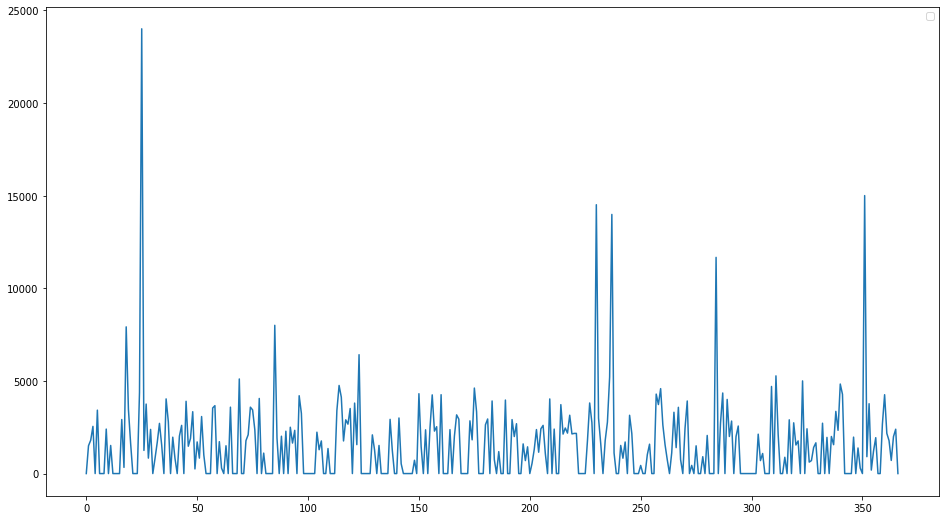

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(X.CoapplicantIncome)
plt.legend()